<a href="https://colab.research.google.com/github/aharshit123456/lens_research/blob/master/coslens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install tensorflow

In [13]:
import requests
import os
import numpy as np
from numpy.linalg import norm
import joblib as pickle
from tqdm import tqdm
import os
import PIL
import time
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2B0
import gc
from tensorflow.keras.applications.resnet50 import ResNet50
import math
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.decomposition import PCA

from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenetpre
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

import matplotlib.pyplot as plt
import numpy as np
import os
from glob import glob
import random
from pathlib import Path

import tensorflow as tf
from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
from tensorflow.keras import Model

In [14]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
img_size =224

model = ResNet50(weights='imagenet', include_top=False,input_shape=(img_size, img_size, 3),pooling='max')
model2 = VGG16(weights='imagenet', include_top=False,input_shape=(img_size, img_size, 3),pooling='max')
model3 = EfficientNetV2B0(weights='imagenet', include_top=False,input_shape=(img_size, img_size, 3),pooling='max')

Streaming output truncated to the last 5000 lines.
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op FloorMod in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0

In [16]:
import os
import math
from PIL import Image, UnidentifiedImageError
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet_v2  import preprocess_input as envpre
from tensorflow.keras.applications.vgg16 import preprocess_input as vggpre
from tensorflow.keras.applications.resnet50 import preprocess_input as respre
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobpre

from tqdm import tqdm  # Import tqdm for progress bar


# Function to validate image files and catch UnidentifiedImageError
def is_valid_image(file_path):
    try:
        with Image.open(file_path) as img:
            img.verify()  # Verify the file is a valid image
        return True
    except (IOError, SyntaxError, UnidentifiedImageError):
        return False

# Parameters
batch_size = 64
root_dir = '/content/drive/MyDrive/Caltech101/data'
img_size = 224  # Update as per your model requirements

# Create ImageDataGenerator
img_gen = ImageDataGenerator(preprocessing_function=respre)

# Load all files and validate them
datagen = img_gen.flow_from_directory(
    root_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False
)

# Validate and filter files with a progress bar
print("Validating images...")
valid_files = []
for file in tqdm(datagen.filenames, desc="Validation Progress"):
    if is_valid_image(os.path.join(root_dir, file)):
        valid_files.append(file)

print(f"Number of valid images: {len(valid_files)}")

# Filter the valid filenames in the data generator
datagen.filenames = valid_files

# Recompute the number of images and epochs
num_images = len(datagen.filenames)
num_epochs = int(math.ceil(num_images / batch_size))

# Debugging the valid filenames
print("Valid filenames:", datagen.filenames[:10])  # Print the first 10 valid files for verification

Found 282 images belonging to 42 classes.
Validating images...


Validation Progress: 100%|██████████| 282/282 [00:02<00:00, 100.56it/s]

Number of valid images: 282
Valid filenames: ['Armin_Arlert/image_1.jpeg', 'Armin_Arlert/image_10.jpeg', 'Armin_Arlert/image_2.jpeg', 'Armin_Arlert/image_3.jpeg', 'Armin_Arlert/image_4.jpeg', 'Armin_Arlert/image_5.jpeg', 'Armin_Arlert/image_6.jpeg', 'Armin_Arlert/image_7.jpeg', 'Armin_Arlert/image_8.jpeg', 'Bulma/image_1.jpeg']


In [ ]:
!pip install codecarbon

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.2/516.2 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.4/386.4 kB 29.0 MB/s eta 0:00:00
  Attempting uninstall: termcolor
    Found existing installation: termcolor 2.5.0
    Uninstalling termcolor-2.5.0:
      Successfully uninstalled termcolor-2.5.0
  Attempting uninstall: prompt_toolkit
    Found existing installation: prompt_toolkit 3.0.48
    Uninstalling prompt_toolkit-3.0.48:
      Successfully uninstalled prompt_toolkit-3.0.48
  Attempting uninstall: httpx
    Found existing installation: httpx 0.28.1
    Uninstalling httpx

In [ ]:
!pip install tensorflow-gpu matplotlib codecarbon


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


Num GPUs Available:  1
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op FloorMod in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op 

[codecarbon INFO @ 10:22:28] [setup] RAM Tracking...
[codecarbon INFO @ 10:22:28] [setup] GPU Tracking...
[codecarbon INFO @ 10:22:28] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 10:22:28] [setup] CPU Tracking...
[codecarbon WARNING @ 10:22:28] No CPU tracking mode found. Falling back on CPU constant mode. 
 Linux OS detected: Please ensure RAPL files exist at \sys\class\powercap\intel-rapl to measure CPU

[codecarbon WARNING @ 10:22:29] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:22:30] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:22:30] >>> Tracker's metadata:
[codecarbon INFO @ 10:22:30]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 10:22:30]   Python version: 3.10.12
[codecarbon INFO @ 10:22:30]   CodeCarbon version: 2.8.1
[codecarbon INFO @ 10:22:30]   Available RAM : 12.675 GB
[codecarbon INFO @ 10:22:30]   CPU count: 2
[codeca

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 1/10
Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
E

[codecarbon INFO @ 10:23:15] Energy consumed for RAM : 0.000059 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 10:23:15] Energy consumed for all GPUs : 0.000339 kWh. Total GPU Power : 27.3092523984682 W
[codecarbon INFO @ 10:23:15] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:23:15] 0.000930 kWh of electricity used since the beginning.


Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/

[codecarbon INFO @ 10:23:30] Energy consumed for RAM : 0.000079 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 10:23:30] Energy consumed for all GPUs : 0.000452 kWh. Total GPU Power : 27.193665368501833 W
[codecarbon INFO @ 10:23:30] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:23:30] 0.001240 kWh of electricity used since the beginning.


Executing op __inference_one_step_on_iterator_44840 in device /job:localhost/replica:0/task:0/device:GPU:0


[codecarbon INFO @ 10:23:45] Energy consumed for RAM : 0.000099 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 10:23:45] Energy consumed for all GPUs : 0.000566 kWh. Total GPU Power : 27.458998145216956 W
[codecarbon INFO @ 10:23:45] Energy consumed for all CPUs : 0.000886 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:23:45] 0.001551 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:24:00] Energy consumed for RAM : 0.000119 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 10:24:00] Energy consumed for all GPUs : 0.000771 kWh. Total GPU Power : 49.10880970536135 W
[codecarbon INFO @ 10:24:00] Energy consumed for all CPUs : 0.001062 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:24:00] 0.001952 kWh of electricity used since the beginning.


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mean in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mean in device /job:localhost/replica:0/task:0/device:GPU:0
1/5 ━━━━━━━━━━━━━━━━━━━━ 4:56 74s/step - accuracy: 0.0312 - loss: 24.6719Executing op __inference_one_step_on_iterator_44840 in device /job:localhost/replica:0/task:0/device:GPU:0


[codecarbon INFO @ 10:24:15] Energy consumed for RAM : 0.000139 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 10:24:15] Energy consumed for all GPUs : 0.000894 kWh. Total GPU Power : 29.498142206180514 W
[codecarbon INFO @ 10:24:15] Energy consumed for all CPUs : 0.001240 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:24:15] 0.002272 kWh of electricity used since the beginning.


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mean in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mean in device /job:localhost/replica:0/task:0/device:GPU:0
2/5 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.0469 - loss: 23.9887Executing op __inference_one_step_on_iterator_44840 in device /job:localhost/replica:0/task:0/device:GPU:0


[codecarbon INFO @ 10:24:30] Energy consumed for RAM : 0.000158 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 10:24:30] Energy consumed for all GPUs : 0.001016 kWh. Total GPU Power : 29.434273991483423 W
[codecarbon INFO @ 10:24:30] Energy consumed for all CPUs : 0.001417 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:24:30] 0.002591 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:24:30] 0.002995 g.CO2eq/s mean an estimation of 94.45445374005439 kg.CO2eq/year


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mean in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mean in device /job:localhost/replica:0/task:0/device:GPU:0
3/5 ━━━━━━━━━━━━━━━━━━━━ 15s 8s/step - accuracy: 0.0521 - loss: 23.6644  Executing op __inference_one_step_on_iterator_44840 in device /job:localhost/replica:0/task:0/device:GPU:0


[codecarbon INFO @ 10:24:45] Energy consumed for RAM : 0.000178 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 10:24:45] Energy consumed for all GPUs : 0.001141 kWh. Total GPU Power : 29.888649481979684 W
[codecarbon INFO @ 10:24:45] Energy consumed for all CPUs : 0.001594 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:24:45] 0.002912 kWh of electricity used since the beginning.


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mean in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mean in device /job:localhost/replica:0/task:0/device:GPU:0
4/5 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.0527 - loss: 23.3722Executing op __inference_one_step_on_iterator_44840 in device /job:localhost/replica:0/task:0/device:GPU:0


[codecarbon INFO @ 10:25:00] Energy consumed for RAM : 0.000198 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 10:25:00] Energy consumed for all GPUs : 0.001265 kWh. Total GPU Power : 29.797103237254138 W
[codecarbon INFO @ 10:25:00] Energy consumed for all CPUs : 0.001771 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:25:00] 0.003233 kWh of electricity used since the beginning.


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mean in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mean in device /job:localhost/replica:0/task:0/device:GPU:0
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.0547 - loss: 23.0084 Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DivNoNan in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DivNoNan in device /job:localhost/replica:0/task:0/d

[codecarbon INFO @ 10:25:15] Energy consumed for RAM : 0.000218 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 10:25:15] Energy consumed for all GPUs : 0.001389 kWh. Total GPU Power : 29.791095647911455 W
[codecarbon INFO @ 10:25:15] Energy consumed for all CPUs : 0.001948 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:25:15] 0.003554 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:25:30] Energy consumed for RAM : 0.000237 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 10:25:30] Energy consumed for all GPUs : 0.001507 kWh. Total GPU Power : 28.2446440646132 W
[codecarbon INFO @ 10:25:30] Energy consumed for all CPUs : 0.002125 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:25:30] 0.003869 kWh of electricity used since the beginning.


Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_one_step_on_iterator_47506 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost

[codecarbon INFO @ 10:25:45] Energy consumed for RAM : 0.000257 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 10:25:45] Energy consumed for all GPUs : 0.001626 kWh. Total GPU Power : 28.659485332978843 W
[codecarbon INFO @ 10:25:45] Energy consumed for all CPUs : 0.002302 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:25:45] 0.004185 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:26:00] Energy consumed for RAM : 0.000277 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 10:26:00] Energy consumed for all GPUs : 0.001824 kWh. Total GPU Power : 47.55803246633841 W
[codecarbon INFO @ 10:26:00] Energy consumed for all CPUs : 0.002479 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:26:00] 0.004580 kWh of electricity used since the beginning.


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mean in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mean in device /job:localhost/replica:0/task:0/device:GPU:0
1/5 ━━━━━━━━━━━━━━━━━━━━ 2:08 32s/step - accuracy: 0.0417 - loss: 16.7220Executing op __inference_one_step_on_iterator_44840 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mean in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Range in device /job:localhost/replica:0/task:

[codecarbon INFO @ 10:26:15] Energy consumed for RAM : 0.000297 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 10:26:15] Energy consumed for all GPUs : 0.001982 kWh. Total GPU Power : 37.92517383551419 W
[codecarbon INFO @ 10:26:15] Energy consumed for all CPUs : 0.002656 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:26:15] 0.004935 kWh of electricity used since the beginning.


Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DivNoNan in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DivNoNan in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mean in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mean in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Range in device /job:localhost/replica:0/task:0

[codecarbon INFO @ 10:26:30] Energy consumed for RAM : 0.000317 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 10:26:30] Energy consumed for all GPUs : 0.002187 kWh. Total GPU Power : 49.203011609959844 W
[codecarbon INFO @ 10:26:30] Energy consumed for all CPUs : 0.002833 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:26:30] 0.005336 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:26:30] 0.003174 g.CO2eq/s mean an estimation of 100.08052824208951 kg.CO2eq/year


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mean in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mean in device /job:localhost/replica:0/task:0/device:GPU:0
4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 772ms/step - accuracy: 0.9128 - loss: 0.3915Executing op __inference_one_step_on_iterator_44840 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mean in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Range in device /job:localhost/replica:0/task:0

[codecarbon INFO @ 10:26:45] Energy consumed for RAM : 0.000336 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 10:26:45] Energy consumed for all GPUs : 0.002384 kWh. Total GPU Power : 47.37682619430242 W
[codecarbon INFO @ 10:26:45] Energy consumed for all CPUs : 0.003010 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:26:45] 0.005731 kWh of electricity used since the beginning.


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mean in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mean in device /job:localhost/replica:0/task:0/device:GPU:0
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 758ms/step - accuracy: 0.9530 - loss: 0.1888Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DivNoNan in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DivNoNan in device /job:localhost/replica:0/task:0/d

[codecarbon INFO @ 10:26:51] Energy consumed for RAM : 0.000345 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 10:26:51] Energy consumed for all GPUs : 0.002465 kWh. Total GPU Power : 47.04917254290983 W
[codecarbon INFO @ 10:26:51] Energy consumed for all CPUs : 0.003083 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:26:51] 0.005893 kWh of electricity used since the beginning.
/usr/local/lib/python3.10/dist-packages/codecarbon/output_methods/file.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame.from_records([dict(total.values)])])


Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_one_step_on_iterator_47506 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mean in device /job:localhost/replica:0/task:0/d

Test Accuracy: 3.12%
Carbon emissions: 0.0008 kg CO2
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/

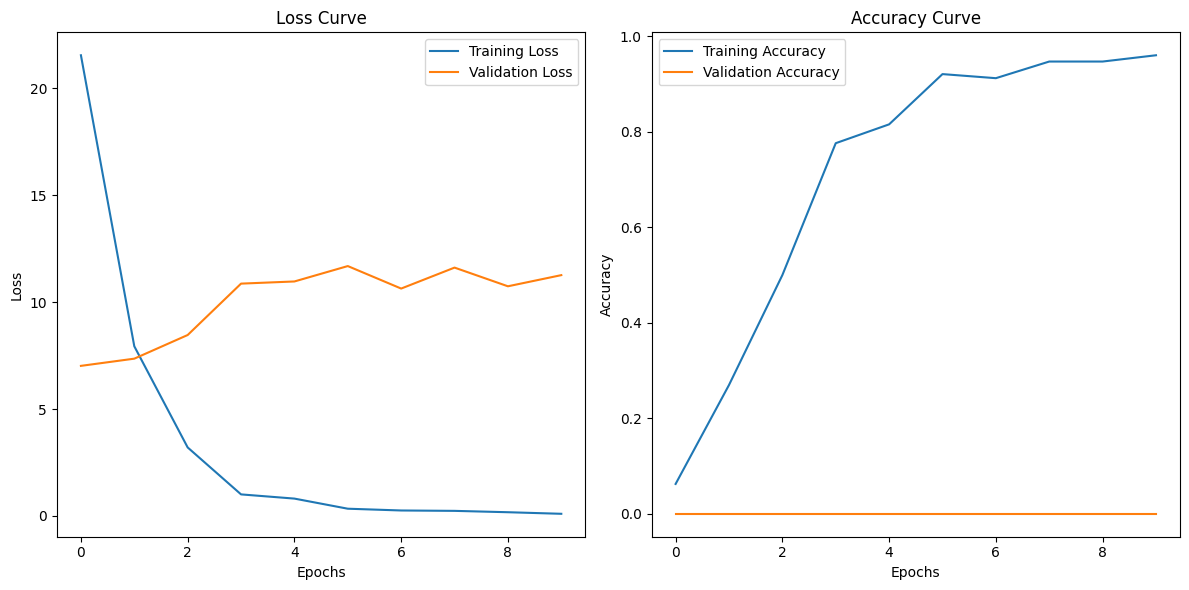

In [ ]:
import os
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from codecarbon import EmissionsTracker  # For energy tracking
import tensorflow as tf

# Ensure GPU is used
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.debugging.set_log_device_placement(True)  # Logs GPU usage

# Parameters
root_dir = '/content/drive/MyDrive/Caltech101/data'
img_size = 224  # ResNet50 input size
batch_size = 32
epochs = 10

# Function to extract label from folder name
def extract_label(filepath):
    return os.path.basename(os.path.dirname(filepath))

# Prepare dataset
def prepare_dataset(data_dir):
    image_paths = []
    labels = []
    label_to_index = {}

    for i, label in enumerate(sorted(os.listdir(data_dir))):
        label_to_index[label] = i
        folder_path = os.path.join(data_dir, label)
        for image_name in os.listdir(folder_path):
            image_paths.append(os.path.join(folder_path, image_name))
            labels.append(label_to_index[label])

    return image_paths, labels, label_to_index

# Load and preprocess dataset
image_paths, labels, label_to_index = prepare_dataset(root_dir)
num_classes = len(label_to_index)
labels = to_categorical(labels, num_classes)

# Split into train, validation, and test sets
train_paths, test_paths, train_labels, test_labels = train_test_split(image_paths, labels, test_size=0.2, random_state=42)
train_paths, val_paths, train_labels, val_labels = train_test_split(train_paths, train_labels, test_size=0.2, random_state=42)

# Image preprocessing function
def preprocess_image(image_path):
    from tensorflow.keras.preprocessing.image import load_img, img_to_array
    image = load_img(image_path, target_size=(img_size, img_size))
    image = img_to_array(image)
    image /= 255.0  # Normalize pixel values
    return image

# Data generators
def data_generator(image_paths, labels, batch_size):
    while True:
        for i in range(0, len(image_paths), batch_size):
            batch_paths = image_paths[i:i + batch_size]
            batch_labels = labels[i:i + batch_size]
            images = np.array([preprocess_image(path) for path in batch_paths])
            yield images, np.array(batch_labels)

train_gen = data_generator(train_paths, train_labels, batch_size)
val_gen = data_generator(val_paths, val_labels, batch_size)
test_gen = data_generator(test_paths, test_labels, batch_size)

# Load pretrained ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3), pooling='max')

# Add custom classifier on top
model = models.Sequential([
    base_model,
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Initialize emissions tracker
tracker = EmissionsTracker()
tracker.start()

# Train the model and record history
steps_per_epoch = len(train_paths) // batch_size
validation_steps = len(val_paths) // batch_size

history = model.fit(
    train_gen,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_gen,
    validation_steps=validation_steps,
    epochs=epochs
)

# Stop emissions tracker
emissions = tracker.stop()

# Evaluate on test data
test_steps = len(test_paths) // batch_size
test_loss, test_accuracy = model.evaluate(test_gen, steps=test_steps)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Carbon emissions: {emissions:.4f} kg CO2")

# Save the model
model.save('cosplay_resnet50.h5')

# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from codecarbon import EmissionsTracker

# Connect to TPU
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # Detect TPU
    print(f"Running on TPU {tpu.cluster_spec().as_dict()}")
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)  # TPU Strategy
except ValueError:
    print("TPU not found. Using default strategy.")
    strategy = tf.distribute.get_strategy()  # Fallback to default

print(f"Number of accelerators: {strategy.num_replicas_in_sync}")

# Parameters
root_dir = '/content/drive/MyDrive/Caltech101/data'
img_size = 224  # ResNet50 input size
batch_size = 128  # Increased for TPU
epochs = 10

# Function to extract label from folder name
def extract_label(filepath):
    return os.path.basename(os.path.dirname(filepath))

# Prepare dataset
def prepare_dataset(data_dir):
    image_paths = []
    labels = []
    label_to_index = {}

    for i, label in enumerate(sorted(os.listdir(data_dir))):
        label_to_index[label] = i
        folder_path = os.path.join(data_dir, label)
        for image_name in os.listdir(folder_path):
            image_paths.append(os.path.join(folder_path, image_name))
            labels.append(label_to_index[label])

    return image_paths, labels, label_to_index

# Load and preprocess dataset
image_paths, labels, label_to_index = prepare_dataset(root_dir)
num_classes = len(label_to_index)
labels = to_categorical(labels, num_classes)

# Split into train, validation, and test sets
train_paths, test_paths, train_labels, test_labels = train_test_split(image_paths, labels, test_size=0.2, random_state=42)
train_paths, val_paths, train_labels, val_labels = train_test_split(train_paths, train_labels, test_size=0.2, random_state=42)

# Preprocessing function
def preprocess_image(image_path):
    image = tf.io.read_file(image_path)  # Read the file
    image = tf.image.decode_jpeg(image, channels=3)  # Decode as JPEG, ensuring it has 3 channels
    image = tf.image.resize(image, [img_size, img_size])  # Resize to the target size
    image = image / 255.0  # Normalize pixel values to [0, 1]
    return image


def preprocess_data(image_path, label):
    image = preprocess_image(image_path)
    return image, label

# Create tf.data pipelines
def create_dataset(image_paths, labels, batch_size, is_training=True):
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
    dataset = dataset.map(preprocess_data, num_parallel_calls=tf.data.AUTOTUNE)
    if is_training:
        dataset = dataset.shuffle(buffer_size=1000).repeat()
    dataset = dataset.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)
    return dataset

train_dataset = create_dataset(train_paths, train_labels, batch_size, is_training=True)
val_dataset = create_dataset(val_paths, val_labels, batch_size, is_training=False)
test_dataset = create_dataset(test_paths, test_labels, batch_size, is_training=False)

# Build and compile model within TPU strategy scope
with strategy.scope():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3), pooling='max')
    model = models.Sequential([
        base_model,
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Initialize emissions tracker
tracker = EmissionsTracker()
tracker.start()

# Train the model
steps_per_epoch = len(train_paths) // batch_size
validation_steps = len(val_paths) // batch_size

history = model.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_dataset,
    validation_steps=validation_steps,
    epochs=epochs
)

# Stop emissions tracker
emissions = tracker.stop()

# Evaluate on test data
test_steps = len(test_paths) // batch_size
test_loss, test_accuracy = model.evaluate(test_dataset, steps=test_steps)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Carbon emissions: {emissions:.4f} kg CO2")

# Save the model
model.save('cosplay_resnet50_tpu.h5')

# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Running on TPU {}


In [ ]:
import os
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Parameters
root_dir = '/content/drive/MyDrive/Caltech101/data'
img_size = 224  # ResNet50 input size
batch_size = 32
epochs = 10

# Function to extract label from folder name
def extract_label(filepath):
    return os.path.basename(os.path.dirname(filepath))

# Prepare dataset
def prepare_dataset(data_dir):
    image_paths = []
    labels = []
    label_to_index = {}

    for i, label in enumerate(sorted(os.listdir(data_dir))):
        label_to_index[label] = i
        folder_path = os.path.join(data_dir, label)
        for image_name in os.listdir(folder_path):
            image_paths.append(os.path.join(folder_path, image_name))
            labels.append(label_to_index[label])

    return image_paths, labels, label_to_index

# Load and preprocess dataset
image_paths, labels, label_to_index = prepare_dataset(root_dir)
num_classes = len(label_to_index)
labels = to_categorical(labels, num_classes)

# Split into train, validation, and test sets
train_paths, test_paths, train_labels, test_labels = train_test_split(image_paths, labels, test_size=0.2, random_state=42)
train_paths, val_paths, train_labels, val_labels = train_test_split(train_paths, train_labels, test_size=0.2, random_state=42)

# Image preprocessing function
def preprocess_image(image_path):
    from tensorflow.keras.preprocessing.image import load_img, img_to_array
    image = load_img(image_path, target_size=(img_size, img_size))
    image = img_to_array(image)
    image /= 255.0  # Normalize pixel values
    return image

# Data generators
def data_generator(image_paths, labels, batch_size):
    while True:
        for i in range(0, len(image_paths), batch_size):
            batch_paths = image_paths[i:i + batch_size]
            batch_labels = labels[i:i + batch_size]
            images = np.array([preprocess_image(path) for path in batch_paths])
            yield images, np.array(batch_labels)

train_gen = data_generator(train_paths, train_labels, batch_size)
val_gen = data_generator(val_paths, val_labels, batch_size)
test_gen = data_generator(test_paths, test_labels, batch_size)

# Load pretrained ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3), pooling='max')

# Add custom classifier on top
model = models.Sequential([
    base_model,
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
steps_per_epoch = len(train_paths) // batch_size
validation_steps = len(val_paths) // batch_size

history = model.fit(
    train_gen,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_gen,
    validation_steps=validation_steps,
    epochs=epochs
)

# Evaluate on test data
test_steps = len(test_paths) // batch_size
test_loss, test_accuracy = model.evaluate(test_gen, steps=test_steps)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Save the model
model.save('cosplay_resnet50.h5')

Epoch 1/10
3/5 ━━━━━━━━━━━━━━━━━━━━ 55s 28s/step - accuracy: 0.0174 - loss: 25.2436 

KeyboardInterrupt: 

In [ ]:
# Ensure GPU is available
if tf.config.list_physical_devices('GPU'):
    print("Running on GPU!")
else:
    print("GPU not available, running on CPU.")

# Predict features using the model
try:

    feature_list = model.predict(datagen, num_epochs)
    print("Num images   = ", num_images)
    print("Shape of feature_list = ", feature_list.shape)
except Exception as e:
    print(f"Error during prediction: {e}")

Running on GPU!
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op IteratorGetNext in device /job:localhost/replica:0/task:0/device:CPU:0


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Executing op __inference_one_step_on_data_distributed_52622 in device /job:localhost/replica:0/task:0/device:GPU:0
1/5 ━━━━━━━━━━━━━━━━━━━━ 38s 10s/stepExecuting op IteratorGetNext in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_one_step_on_data_distributed_52622 in device /job:localhost/replica:0/task:0/device:GPU:0
2/5 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/stepExecuting op IteratorGetNext in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_one_step_on_data_distributed_52622 in device /job:localhost/replica:0/task:0/device:GPU:0
3/5 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/stepExecuting op IteratorGetNext in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_one_step_on_data_distributed_52622 in device /job:localhost/replica:0/task:0/device:GPU:0
4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 976ms/stepExecuting op IteratorGetNext in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_one_step_on_data_distributed

In [ ]:
import numpy as np

# Save the feature_list as a .npy file
file_name = "cosplay.npy"
np.save(file_name, feature_list)

# Download the file to your local system
from google.colab import files
files.download(file_name)

print(f"Feature list saved and ready for download as {file_name}.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Feature list saved and ready for download as cosplay.npy.


In [18]:
feature_list.shape

(282, 42)

In [19]:
filenames = [root_dir + '/' + s for s in datagen.filenames]

In [20]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=5,
                             algorithm='ball_tree',
                             metric='minkowski')
neighbors.fit(feature_list)

NearestNeighbors(algorithm='ball_tree')

In [27]:
model = tf.keras.models.load_model('cosplay_resnet50.h5')

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op FloorMod in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:loca

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


In [28]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 42)                  │          10,794 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,123,052 (92.02 MB)

 Trainable params: 24,069,930 (91.82 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 2 (12.00 B)

None


In [31]:
import os
import random
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import precision_score, recall_score, ndcg_score
from tqdm import tqdm

# Helper function to extract the label from the path
def extract_label(img_path):
    return os.path.basename(os.path.dirname(img_path))

# Pick 3-4 random images from each subfolder
def sample_images(folder_path, num_samples=3):
    sampled_images = []
    for root, _, files in os.walk(folder_path):
        if files:
            sampled = random.sample(files, min(num_samples, len(files)))
            sampled_images.extend([os.path.join(root, img) for img in sampled])
    return sampled_images

def extract_class_name(img_path):
    return os.path.basename(os.path.dirname(os.path.dirname(img_path)))


# Similarity search and evaluation
def evaluate_similarity_search(query_images, model, neighbors, filenames):
    precision_scores, recall_scores, ndcg_scores, retrieval_times = [], [], [], []

    print("\n=== Starting Similarity Search Evaluation ===")
    for query_image in tqdm(query_images, desc="Processing Query Images"):
        # Extract the ground-truth label
        ground_truth_label = extract_label(query_image)

        # Preprocess the query image
        # img = image.load_img(query_image, target_size=(img_size, img_size))
        # img_array = image.img_to_array(img)
        # expanded_img_array = np.expand_dims(img_array, axis=0)
        # preprocessed_img = preprocess_image(expanded_img_array)
        # Preprocess the query image using the predefined function
        preprocessed_img = preprocess_image(query_image)  # No need for manual resizing
        preprocessed_img = np.expand_dims(preprocessed_img, axis=0)  # Expand dims for batch size


        # Extract features and perform similarity search
        start_time = time.time()
        test_img_features = model.predict(preprocessed_img, batch_size=1)
        retrieval_time = time.time() - start_time
        _, indices = neighbors.kneighbors(test_img_features)
        print(indices)

        # Collect predicted labels
        predicted_labels = [extract_label(filenames[idx]) for idx in indices[0]]

        # Calculate precision, recall, and nDCG
        true_labels = [1 if label == ground_truth_label else 0 for label in predicted_labels]
        precision = precision_score(true_labels, [1] * len(true_labels), zero_division=1)
        recall = recall_score(true_labels, [1] * len(true_labels), zero_division=1)
        ndcg = ndcg_score([true_labels], [[1] * len(true_labels)])

        print(true_labels)
        print(predicted_labels, ground_truth_label)
        # Store metrics
        precision_scores.append(precision)
        recall_scores.append(recall)
        ndcg_scores.append(ndcg)
        retrieval_times.append(retrieval_time)

        # Display query and similar images
        # plt.imshow(mpimg.imread(query_image))
        # plt.title(f"Query: {ground_truth_label}")
        # plt.axis('off')
        # plt.show()

        # print(f"Predicted labels: {predicted_labels}")
        # print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, nDCG: {ndcg:.2f}, Retrieval Time: {retrieval_time:.2f}s")

    # Report average metrics
    print("\n=== Average Metrics ===")
    print(f"Precision: {np.mean(precision_scores):.2f}")
    print(f"Recall: {np.mean(recall_scores):.2f}")
    print(f"nDCG: {np.mean(ndcg_scores):.2f}")
    print(f"Retrieval Time: {np.mean(retrieval_times):.2f}s")

# Paths and configurations
folder_path = '/content/drive/MyDrive/Caltech101/data'
query_images = sample_images(folder_path)
# filenames = datagen.filenames  # List of all file paths used for similarity search

# # # Evaluate the similarity search model
evaluate_similarity_search(query_images, model, neighbors, filenames)



=== Starting Similarity Search Evaluation ===


Processing Query Images:   0%|          | 0/117 [00:00<?, ?it/s]

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing o

Processing Query Images:   1%|          | 1/117 [00:00<00:39,  2.94it/s]

[1, 0, 0, 0, 0]
['Yoruichi_Shihouin', 'Gaara', 'Naruto_Uzumaki', 'Gaara', 'Erwin_Smith'] Yoruichi_Shihouin
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/d

Processing Query Images:   2%|▏         | 2/117 [00:00<00:33,  3.43it/s]

[1, 0, 0, 0, 0]
['Yoruichi_Shihouin', 'Gaara', 'Naruto_Uzumaki', 'Gaara', 'Erwin_Smith'] Yoruichi_Shihouin
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/d

Processing Query Images:   3%|▎         | 3/117 [00:00<00:36,  3.13it/s]

[1, 0, 0, 0, 0]
['Yoruichi_Shihouin', 'Gaara', 'Naruto_Uzumaki', 'Gaara', 'Erwin_Smith'] Yoruichi_Shihouin
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/d

Processing Query Images:   3%|▎         | 4/117 [00:01<00:39,  2.88it/s]

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing o

Processing Query Images:   4%|▍         | 5/117 [00:01<00:35,  3.16it/s]

[[270  44 173  42  32]]
[0, 0, 0, 0, 0]
['Yoruichi_Shihouin', 'Gaara', 'Naruto_Uzumaki', 'Gaara', 'Erwin_Smith'] Vegeta
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/repli

Processing Query Images:   5%|▌         | 6/117 [00:01<00:34,  3.18it/s]


['Yoruichi_Shihouin', 'Gaara', 'Naruto_Uzumaki', 'Gaara', 'Erwin_Smith'] Vegeta
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op P

Processing Query Images:   6%|▌         | 7/117 [00:02<00:41,  2.66it/s]

[[270  44 173  42  32]]
[0, 0, 0, 0, 0]
['Yoruichi_Shihouin', 'Gaara', 'Naruto_Uzumaki', 'Gaara', 'Erwin_Smith'] Sasuke_Uchiha
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhos

Processing Query Images:   7%|▋         | 8/117 [00:02<00:41,  2.66it/s]

[0, 0, 0, 0, 0]
['Yoruichi_Shihouin', 'Gaara', 'Naruto_Uzumaki', 'Gaara', 'Erwin_Smith'] Sasuke_Uchiha
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/devic

Processing Query Images:   8%|▊         | 9/117 [00:03<00:39,  2.70it/s]

[0, 0, 0, 0, 0]
['Yoruichi_Shihouin', 'Gaara', 'Naruto_Uzumaki', 'Gaara', 'Erwin_Smith'] Sasuke_Uchiha
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/devic

Processing Query Images:   9%|▊         | 10/117 [00:03<00:43,  2.48it/s]


Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Processing Query Images:   9%|▉         | 11/117 [00:03<00:40,  2.62it/s]

 Sakura_Haruno
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CP

Processing Query Images:  10%|█         | 12/117 [00:04<00:37,  2.76it/s]


Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0


KeyboardInterrupt: 

Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op IteratorGetNext in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_one_step_on_data_distributed_68130 in device /job:localhost/replica:0/task:0/device:GPU:0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
[[270  44 173  42  32]]


Processing Query Images:  11%|█         | 13/117 [00:04<00:45,  2.27it/s]

[0, 0, 0, 0, 0]
['Yoruichi_Shihouin', 'Gaara', 'Naruto_Uzumaki', 'Gaara', 'Erwin_Smith'] Saitama
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:

Processing Query Images:  12%|█▏        | 14/117 [00:05<00:44,  2.33it/s]

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing o

Processing Query Images:  13%|█▎        | 15/117 [00:05<00:38,  2.63it/s]

[[270  44 173  42  32]]
[0, 0, 0, 0, 0]
['Yoruichi_Shihouin', 'Gaara', 'Naruto_Uzumaki', 'Gaara', 'Erwin_Smith'] Saitama
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/repl

Processing Query Images:  14%|█▎        | 16/117 [00:05<00:32,  3.07it/s]

[0, 0, 0, 0, 0]
['Yoruichi_Shihouin', 'Gaara', 'Naruto_Uzumaki', 'Gaara', 'Erwin_Smith'] Zeke_Yeager
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:

Processing Query Images:  15%|█▍        | 17/117 [00:06<00:31,  3.20it/s]

[0, 0, 0, 0, 0]
['Yoruichi_Shihouin', 'Gaara', 'Naruto_Uzumaki', 'Gaara', 'Erwin_Smith'] Zeke_Yeager
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:

Processing Query Images:  15%|█▌        | 18/117 [00:06<00:30,  3.27it/s]

[[270  44 173  42  32]]
[0, 0, 0, 0, 0]
['Yoruichi_Shihouin', 'Gaara', 'Naruto_Uzumaki', 'Gaara', 'Erwin_Smith'] Zeke_Yeager
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/

Processing Query Images:  16%|█▌        | 19/117 [00:06<00:26,  3.72it/s]

[0, 0, 0, 0, 0]
['Yoruichi_Shihouin', 'Gaara', 'Naruto_Uzumaki', 'Gaara', 'Erwin_Smith'] Tatsumaki
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CP

Processing Query Images:  17%|█▋        | 20/117 [00:06<00:25,  3.78it/s]

[[270  44 173  42  32]]
[0, 0, 0, 0, 0]
['Yoruichi_Shihouin', 'Gaara', 'Naruto_Uzumaki', 'Gaara', 'Erwin_Smith'] Uryu_Ishida
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/

Processing Query Images:  18%|█▊        | 21/117 [00:06<00:23,  4.09it/s]

[0, 0, 0, 0, 0]
['Yoruichi_Shihouin', 'Gaara', 'Naruto_Uzumaki', 'Gaara', 'Erwin_Smith'] Uryu_Ishida
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:

Processing Query Images:  19%|█▉        | 22/117 [00:07<00:22,  4.15it/s]

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing o

Processing Query Images:  20%|█▉        | 23/117 [00:07<00:22,  4.22it/s]

[[270  44 173  42  32]]
[0, 0, 0, 0, 0]
['Yoruichi_Shihouin', 'Gaara', 'Naruto_Uzumaki', 'Gaara', 'Erwin_Smith'] Shikamaru_Nara
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localho

Processing Query Images:  21%|██        | 24/117 [00:07<00:21,  4.35it/s]

[[270  44 173  42  32]]
[0, 0, 0, 0, 0]
['Yoruichi_Shihouin', 'Gaara', 'Naruto_Uzumaki', 'Gaara', 'Erwin_Smith'] Shikamaru_Nara
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localho

Processing Query Images:  21%|██▏       | 25/117 [00:07<00:19,  4.77it/s]

[0, 0, 0, 0, 0]
['Yoruichi_Shihouin', 'Gaara', 'Naruto_Uzumaki', 'Gaara', 'Erwin_Smith'] Shikamaru_Nara
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/devi

Processing Query Images:  22%|██▏       | 26/117 [00:08<00:19,  4.76it/s]

[[270  44 173  42  32]]
[0, 0, 0, 0, 0]
['Yoruichi_Shihouin', 'Gaara', 'Naruto_Uzumaki', 'Gaara', 'Erwin_Smith'] Suzaku_Kururugi
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localh

Processing Query Images:  23%|██▎       | 27/117 [00:08<00:19,  4.56it/s]

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing o

Processing Query Images:  23%|██▎       | 27/117 [00:08<00:28,  3.18it/s]


KeyboardInterrupt: 

In [32]:
from google.colab import files
uploaded = files.upload()

Saving image_2.jpeg to image_2.jpeg


In [33]:
img_path = 'image_2.jpeg'
input_shape = (img_size, img_size, 3)

preprocessed_img = preprocess_image(img_path)  # No need for manual resizing
preprocessed_img = np.expand_dims(preprocessed_img, axis=0)  # Expand dims for batch size

test_img_features = model.predict(preprocessed_img, batch_size=1)
print(test_img_features.shape)
_, indices = neighbors.kneighbors(test_img_features)
print(indices)

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing o

(1, 5)


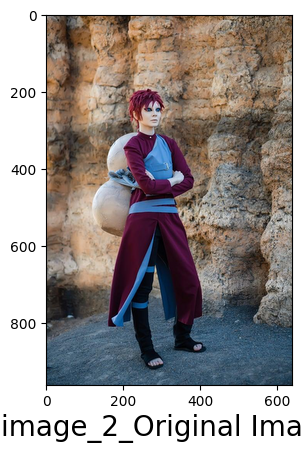

********* Predictions ***********
270
44
173
42
32


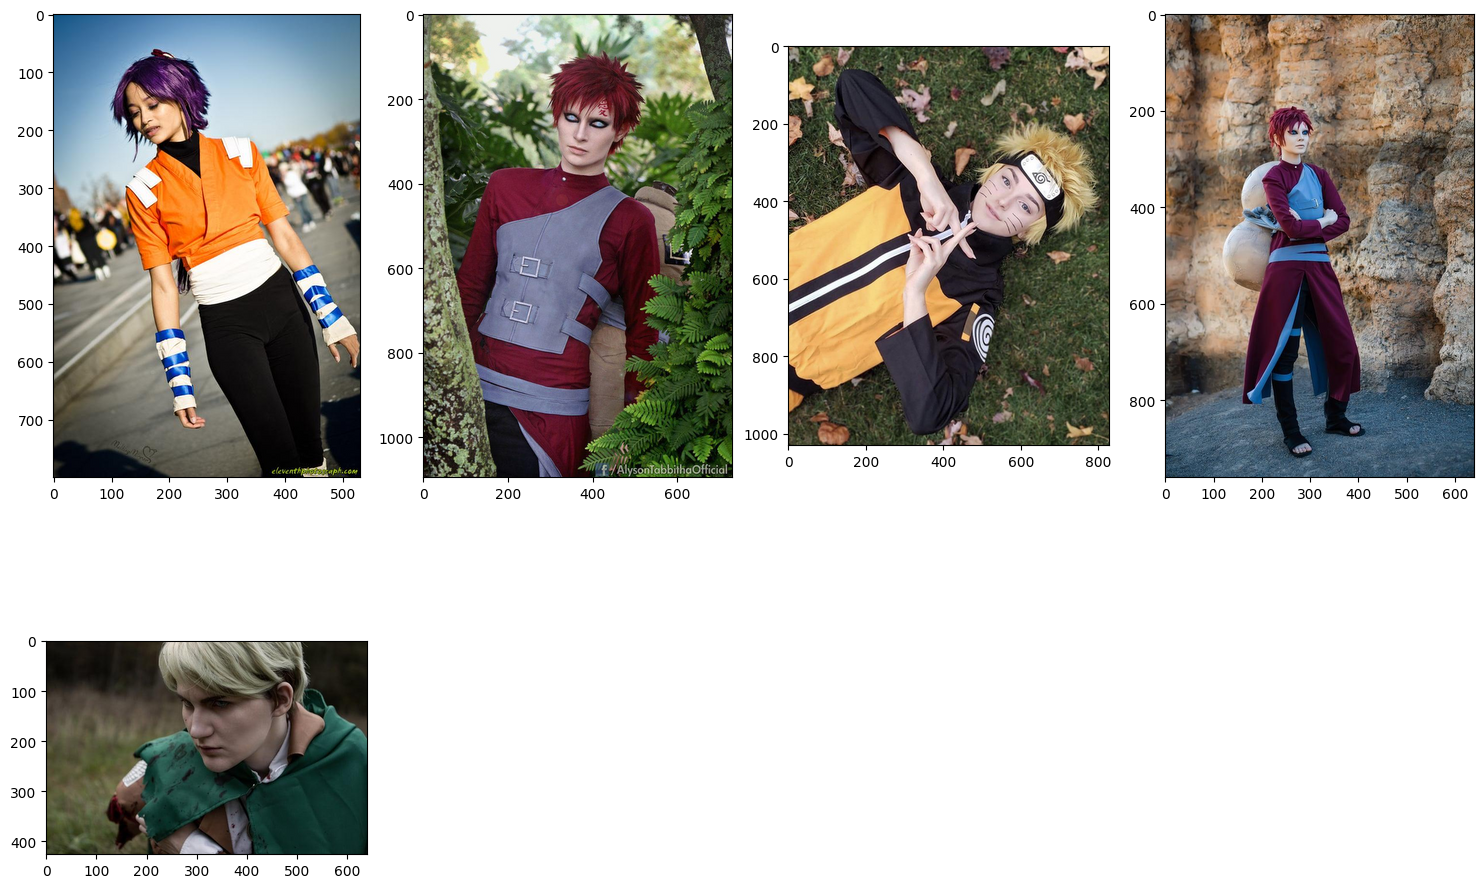

In [34]:
def similar_images(indices):
    plt.figure(figsize=(15,10), facecolor='white')
    plotnumber = 1
    for index in indices:
        print(index)
        if plotnumber<=len(indices) :
            ax = plt.subplot(2,4,plotnumber)
            plt.imshow(mpimg.imread(filenames[index]), interpolation='lanczos')
            plotnumber+=1
    plt.tight_layout()

print(indices.shape)

plt.imshow(mpimg.imread(img_path), interpolation='lanczos')
plt.xlabel(img_path.split('.')[0] + '_Original Image',fontsize=20)
plt.show()
print('********* Predictions ***********')
similar_images(indices[0])